<a href="https://colab.research.google.com/github/Ninja7328/ML-Practicing/blob/main/RNN_on_Tesla_StockData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("/content/Tesla.csv  Tesla.csv.csv")

In [5]:
length_data = len(data) #rows that data has
split_ratio = 0.7 # 70% train and 30% validation
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train
print("Data length:",length_data)
print("Train Data:",length_train)
print("Validation Data:",length_validation)


Data length: 1692
Train Data: 1184
Validation Data: 508


In [6]:
train_data = data[:length_train].iloc[:,:2]
train_data['Date'] = pd.to_datetime(train_data['Date'])  #Converting to data time object
#train_data

validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date']) #Conveerting to date  time object
validation_data

,Date,Open
1184,2015-03-13,188.949997
1185,2015-03-16,192.000000
1186,2015-03-17,195.429993
1187,2015-03-18,194.960007
1188,2015-03-19,202.000000
...,...,...
1687,2017-03-13,244.820007
1688,2017-03-14,246.110001
1689,2017-03-15,257.000000
1690,2017-03-16,262.399994


In [8]:
dataset_train = train_data.Open.values
dataset_train.shape

(1184,)

In [10]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)

dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1184, 1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

#scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)
dataset_train_scaled.shape

(1184, 1)

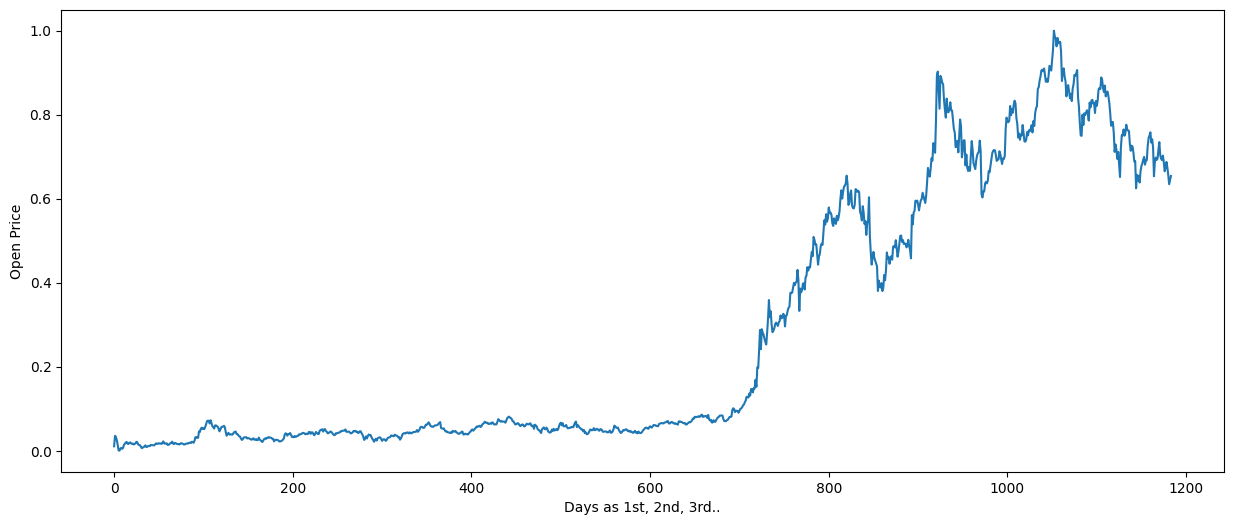

In [12]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [13]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
  X_train.append(dataset_train_scaled[i-time_step:i,0])
  y_train.append(dataset_train_scaled[i,0])

#convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
# Reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

In [18]:
# Importing libraries

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#initializing the RNN
regressor = Sequential()
# adding first RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences= True,
              input_shape = (X_train.shape[1],1))
)
regressor.add(
    Dropout(0.2)
)

# adding second RNN layer and dropout regularization
regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
)

regressor.add(
    Dropout(0.2)
)

# adding third RNN layer and dropout regualrization
regressor.add(
    SimpleRNN(units = 50)
)

regressor.add(
    Dropout(0.2)
)

# adding the output layer
regressor.add(Dense(units = 1))

In [19]:
# compiling RNN

regressor.compile(
    optimizer = "adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"]
)

In [20]:
# fitting the RNN

history = regressor.fit(X_train, y_train, epochs = 50 , batch_size = 32)

Epoch 1/50
36/36 [==============================] - 14s 147ms/step - loss: 0.2569 - accuracy: 8.8183e-04
Epoch 2/50
36/36 [==============================] - 5s 138ms/step - loss: 0.0970 - accuracy: 0.0000e+00
Epoch 3/50
36/36 [==============================] - 5s 150ms/step - loss: 0.0594 - accuracy: 8.8183e-04
Epoch 4/50
36/36 [==============================] - 4s 112ms/step - loss: 0.0452 - accuracy: 8.8183e-04
Epoch 5/50
36/36 [==============================] - 4s 114ms/step - loss: 0.0298 - accuracy: 8.8183e-04
Epoch 6/50
36/36 [==============================] - 5s 151ms/step - loss: 0.0280 - accuracy: 8.8183e-04
Epoch 7/50
36/36 [==============================] - 4s 114ms/step - loss: 0.0273 - accuracy: 8.8183e-04
Epoch 8/50
36/36 [==============================] - 4s 123ms/step - loss: 0.0195 - accuracy: 8.8183e-04
Epoch 9/50
36/36 [==============================] - 5s 136ms/step - loss: 0.0184 - accuracy: 8.8183e-04
Epoch 10/50
36/36 [==============================] - 4s 115ms/s

Text(0, 0.5, 'loss')

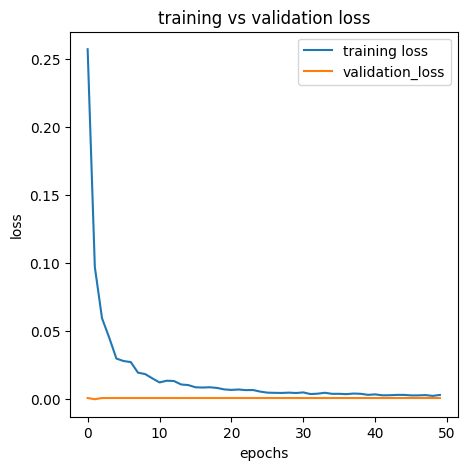

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5,5))
plt.title("training vs validation loss")
plt.plot(np.arange(50),history.history['loss'],label='training loss')
plt.plot(np.arange(50),history.history['accuracy'],label='validation_loss')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")